This dataset is taken from https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019, which is realeased under CC0:Public Domain

![Amazon.jpg](attachment:Amazon.jpg)

Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads
- Name
- Author
- User Rating
- Reviews
- Price
- Year
- Genre

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
books = pd.read_csv("costofliving.csv")
books = pd.read_csv("C:/Users/Effie/Downloads/costofliving.csv")
books

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,NaN,"Hamilton, Bermuda",149.02,96.10,124.22,157.89,155.22,79.43
1,NaN,"Zurich, Switzerland",131.24,69.26,102.19,136.14,132.52,129.79
2,NaN,"Basel, Switzerland",130.93,49.38,92.70,137.07,130.95,111.53
3,NaN,"Zug, Switzerland",128.13,72.12,101.87,132.61,130.93,143.40
4,NaN,"Lugano, Switzerland",123.99,44.99,86.96,129.17,119.80,111.96
...,...,...,...,...,...,...,...,...
573,NaN,"Kanpur, India",20.79,3.60,12.73,22.19,13.31,38.83
574,NaN,"Karachi, Pakistan",20.75,4.84,13.29,18.48,15.21,29.16
575,NaN,"Rawalpindi, Pakistan",20.52,4.78,13.14,18.51,16.18,22.91
576,NaN,"Multan, Pakistan",18.68,2.94,11.30,18.37,11.80,25.09


In [ ]:
books.head()

Identify the features that are categorical
- Name , Author and Genre are categorical features in our dataset

Numerical features
- Rating, Review, Price, Year

In [ ]:
books.shape

There are 550 rows and 7 columns in our dataset

In [ ]:
books.dtypes

Name , Author and Genre are objects where as Reviews, Price, Year are integars and User Rating is float 

In [ ]:
books.describe()

In [ ]:
books.describe(include = ['O'])

There are 550 records of books in our dataset, out of which 351 are unique. Similary, there are 550 Authors and 248 of them are unique. This show we have duplicates in pur dataset

In [ ]:
books.info()

In [ ]:
books.isnull().sum()

There are no null values in out dataset

In [ ]:
duplicatedbooks = books[books.duplicated()]
print(duplicatedbooks)

In [ ]:
duplicatedbooks = books[books[['Name','Author']].duplicated()]
print(duplicatedbooks)

We do have duplicates in Name and Author columns but the year for each row is different. This means the same book was bestseller multiple times, thus we cannot remove these duplicates

In [ ]:
books.nunique()

In [ ]:
books['Year'].value_counts()

(5.0, 0.0)

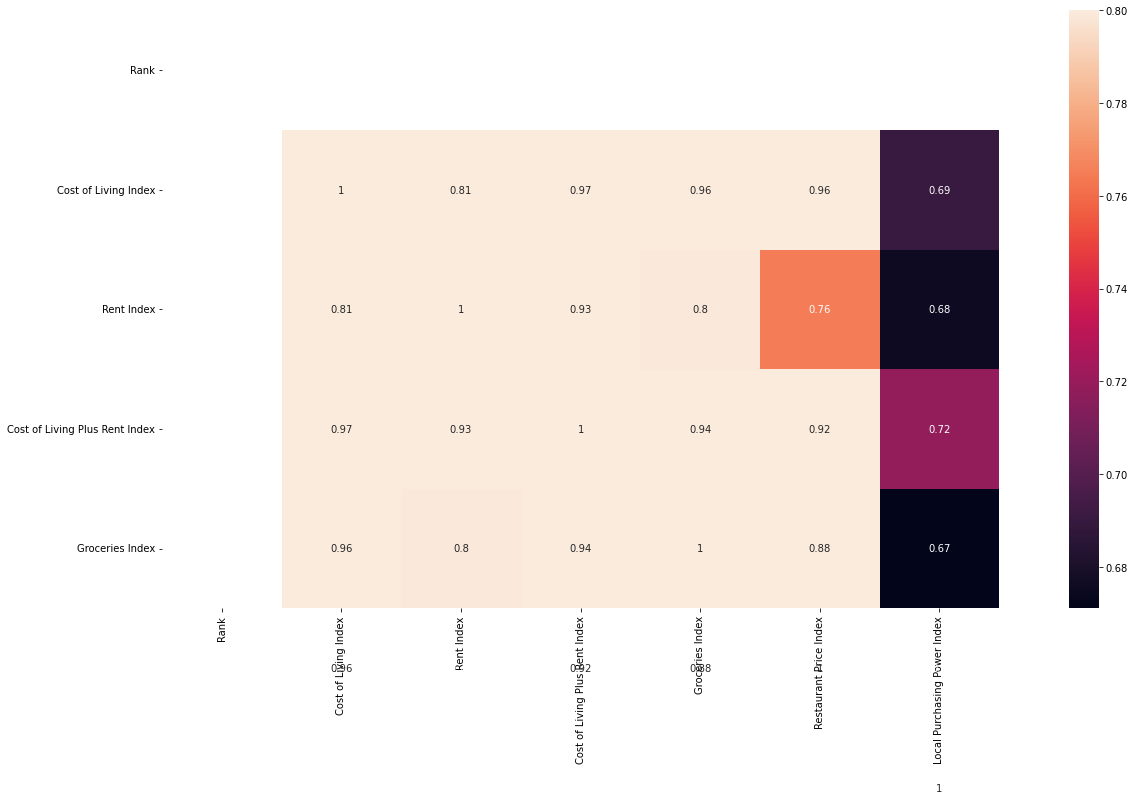

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,11))
ax = sns.heatmap(books.corr(), vmax=0.8, square=True, annot_kws={'size':10}, annot=True)
ax.get_ylim()
(5.5, 0.5)
ax.set_ylim(5.0, 0) 

In [6]:
#Fiction vs Non-fiction books
fiction = len(books[books['Genre'] == 'Fiction'])
non_fiction = len(books[books['Genre'] == 'Non Fiction'])
print('The number of best seller fiction books are :  %i (%.1f%%)'% (fiction, (fiction)/len(books)*100 ))
print('The number of best seller non-fiction books are: %i (%.1f%%)'% (non_fiction,(non_fiction)/len(books)*100 ) )

KeyError: 'Genre'

It is evident that non-fiction books are more popular as compared to fictional books

In [ ]:
#Pie-chart
value = books['Genre'].value_counts()
my_colors = ['darkorange', 'dimgrey']
my_explode = (0, 0.1, 0)
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(value.values,labels=value.index,autopct='%1.1f%%', colors=my_colors)
plt.title('Genre Comparison')
plt.show()

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(books['User Rating'],books['Reviews'], label = "User Rating")
plt.xlabel("User Ratings")
plt.ylabel("Reviews")
plt.title("The Relationship Between User ratings and Reviews")
plt.show()

In [ ]:
#Top 5 Authors with most reviews
book=books.groupby('Author')['Reviews'].agg([sum]).sort_values(by=('sum'),ascending=False).reset_index().head(5)

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_facecolor('dimgrey')
ax1.bar(book['Author'],book['sum'],color='darkorange')
plt.title('Top 5 Authors with most reviews')
plt.xlabel("Authors")
plt.ylabel("Reviews")
plt.show()

The above graph shows Suzanne Collins, John Green are the top 2 authors who has got the most reviews

In [ ]:
#Top 5 Authors with highest ratings (on average)
book=books.groupby('Author')['User Rating'].agg(['mean']).sort_values(by=('mean'),ascending=False).reset_index().head(5)

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_facecolor('dimgrey')
ax1.bar(book['Author'],book['mean'],color='darkorange')
plt.title('Top 5 Authors with highest User Ratings')
plt.xlabel("Authors")
plt.ylabel("Ratings")
plt.show()

The above graph shows Top 5 Authors with respect to highest ratings 

In [ ]:
#Bottom 5 Authors with least reviews
book=books.groupby('Author')['Reviews'].agg([sum]).sort_values(by=('sum'),ascending=True).reset_index().head(5)

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_facecolor('dimgrey')
ax1.bar(book['Author'],book['sum'],color='darkorange')
plt.title('Bottom 5 Authors with least reviews')
plt.xlabel("Authors")
plt.ylabel("Ratings")
plt.show()

In [ ]:
#Top 5 Authors with highest ratings (on average)
book=books.groupby('Author')['User Rating'].agg(['mean']).sort_values(by=('mean'),ascending=True).reset_index().head(5)

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_facecolor('dimgrey')
ax1.bar(book['Author'],book['mean'],color='darkorange')
plt.title('Bottom 5 Authors with lowest ratings')
plt.xlabel("Authors")
plt.ylabel("Ratings")
plt.show()

Here, we see an interesting fact. Gillian Flynn is in the top 5 authors with the most reviews, however in terms of ratings he lies in the bottom 5

In [ ]:
book_author = books['Author'].value_counts().reset_index().head(10)
print(book_author)

In [ ]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_facecolor('dimgrey')
ax1.barh(book_author['index'],book_author['Author'],color='darkorange')
plt.title('Best seller Authors')
plt.show()

Jeff Kinney is the best selling author with 12 best selling books in his record

In [4]:
Jeff_Kinney = books[books["Author"].isin(["Jeff Kinney"]) ]
Jeff_Kinney = Jeff_Kinney.sort_values(by="Year")

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_facecolor('dimgrey')
ax2 = ax1.twinx()
ax1.bar(Jeff_Kinney["Name"],Jeff_Kinney["User Rating"], color = "darkorange", label ="User Rating" )
ax1.set_ylabel("User Rating", fontsize =14)
ax1.tick_params(axis='x', labelrotation = 90)

ax2.plot(Jeff_Kinney["Name"],Jeff_Kinney["Reviews"],color = "saddlebrown",marker ="o",lw =2, label = "Reviews")
ax2.set_ylabel("Reviews", fontsize =13)

plt.suptitle("Books by Jeff_Kinney ", fontsize =20,y =1.01)
plt.title("Titles vs User Ratings and Reviews", fontsize =14)
fig.legend(loc="upper right")
fig.show()

KeyError: 'Author'

In [ ]:
lowest_rated = books[books["User Rating"]==books["User Rating"].min()]
Highest_rated = books[books["User Rating"]==books["User Rating"].max()]

In [ ]:
lowest_rated
     

The lowest rated book in the dataset is 'The Casual Vacancy' by J.K Rowling

In [ ]:
 Highest_rated